# Proyecto Final – Machine Learning  
## Predicción del Porcentaje de Grasa Corporal

Dataset utilizado: **bodyfat_metrico.csv**  
*Melisa Pirez*


**Abstract**

El objetivo de este proyecto es construir un modelo de Machine Learning capaz de **predecir el porcentaje de grasa corporal** de una persona a partir de variables antropométricas (peso, altura, perímetros, edad, etc.).  

Esta predicción puede resultar especialmente útil para:

- **Centros de salud y nutrición**: evaluar composición corporal sin necesidad de métodos invasivos.
- **Gimnasios y entrenadores**: realizar seguimientos rápidos y accesibles.
- **Apps de bienestar físico**: permitir estimaciones confiables a partir de mediciones comunes.
- **Usuarios finales**: obtener un indicador de salud sin equipamiento de laboratorio.

Contar con un modelo preciso facilita el acceso a información clave para la toma de decisiones sobre salud, rendimiento físico y prevención.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
from google.colab import files
uploaded = files.upload()   # Subir bodyfat_metrico.csv

df = pd.read_csv("bodyfat_metrico.csv")
df.head()


Saving bodyfat_metrico.csv to bodyfat_metrico (1).csv


,Densidad,Porcentaje_Grasa,Edad,Peso_lb,Altura_in,Cuello,Pecho,Abdomen,Cadera,Muslo,Rodilla,Tobillo,Bíceps,Antebrazo,Muñeca,Peso_kg,Altura_cm,IMC
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,69.966566,172.085,23.626779
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,78.584814,183.515,23.334338
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,69.853168,168.275,24.668737
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,83.801122,183.515,24.883227
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,83.574326,180.975,25.517358


 **Resumen de Metadata del Dataset**

- El dataset contiene **medidas antropométricas** tomadas de individuos adultos.
- Incluye tanto **variables medidas directamente** (peso, altura, perímetros) como **variables derivadas** (densidad corporal).
- Total de variables: **17 numéricas continuas (float64)** y **1 variable entera (edad)**.
- No se detectaron **valores nulos** ni **duplicados**.
- Rango de edad: **22 a 81 años**.
- Porcentaje de grasa corporal: **0% a 47.5%**, con promedio cercano al **19%**.
- Variable creada: **IMC**, a partir de Peso_kg / Altura_m².


In [ ]:
df.info()
df.describe()
df.isna().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Densidad          252 non-null    float64
 1   Porcentaje_Grasa  252 non-null    float64
 2   Edad              252 non-null    int64  
 3   Peso_lb           252 non-null    float64
 4   Altura_in         252 non-null    float64
 5   Cuello            252 non-null    float64
 6   Pecho             252 non-null    float64
 7   Abdomen           252 non-null    float64
 8   Cadera            252 non-null    float64
 9   Muslo             252 non-null    float64
 10  Rodilla           252 non-null    float64
 11  Tobillo           252 non-null    float64
 12  Bíceps            252 non-null    float64
 13  Antebrazo         252 non-null    float64
 14  Muñeca            252 non-null    float64
 15  Peso_kg           252 non-null    float64
 16  Altura_cm         252 non-null    float64
 1

np.int64(0)

In [ ]:
df["Altura_m"] = df["Altura_cm"] / 100
df["IMC"] = df["Peso_kg"] / (df["Altura_m"]**2)

df.head()


,Densidad,Porcentaje_Grasa,Edad,Peso_lb,Altura_in,Cuello,Pecho,Abdomen,Cadera,Muslo,Rodilla,Tobillo,Bíceps,Antebrazo,Muñeca,Peso_kg,Altura_cm,IMC,Altura_m
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,69.966566,172.085,23.626779,1.72085
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,78.584814,183.515,23.334338,1.83515
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,69.853168,168.275,24.668737,1.68275
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,83.801122,183.515,24.883227,1.83515
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,83.574326,180.975,25.517358,1.80975


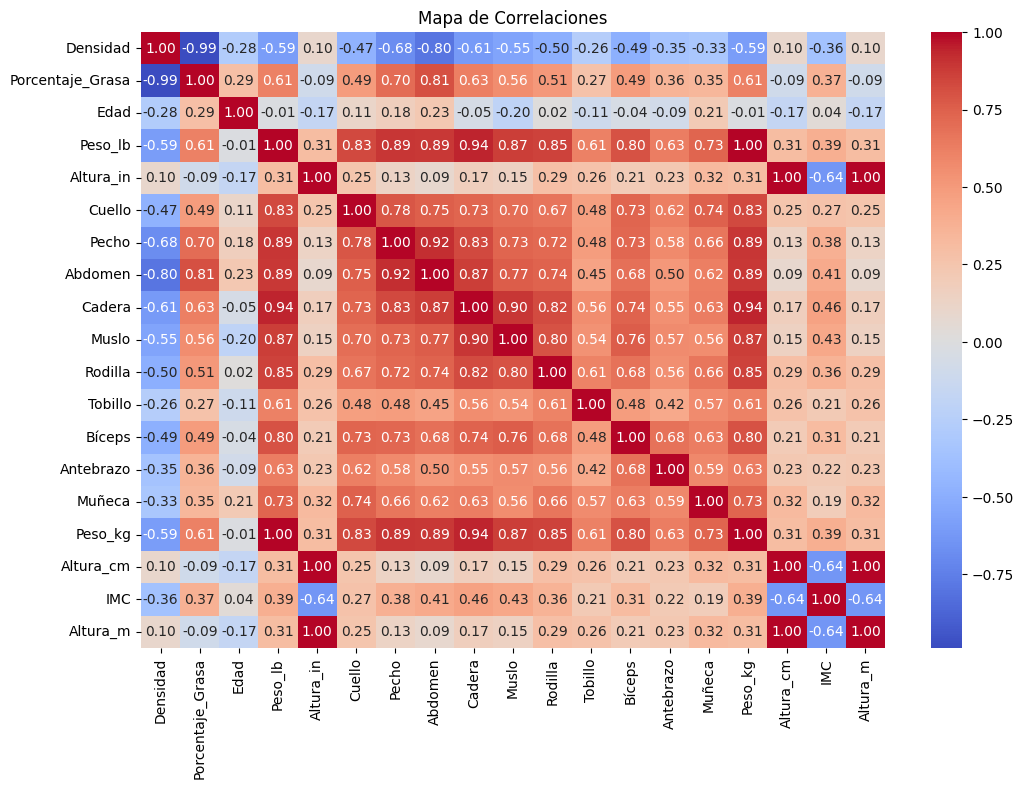

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Correlaciones")
plt.show()


**Hipótesis planteadas**

1. **H1:** Las medidas del abdomen y la cadera tienen una fuerte relación con el porcentaje de grasa corporal.  
2. **H2:** A mayor IMC, mayor porcentaje de grasa corporal.  
3. **H3:** La edad podría tener un impacto moderado en el porcentaje de grasa.  
4. **H4:** Las medidas corporales periféricas (muslo, rodilla, tobillo) tienen menor capacidad predictiva.


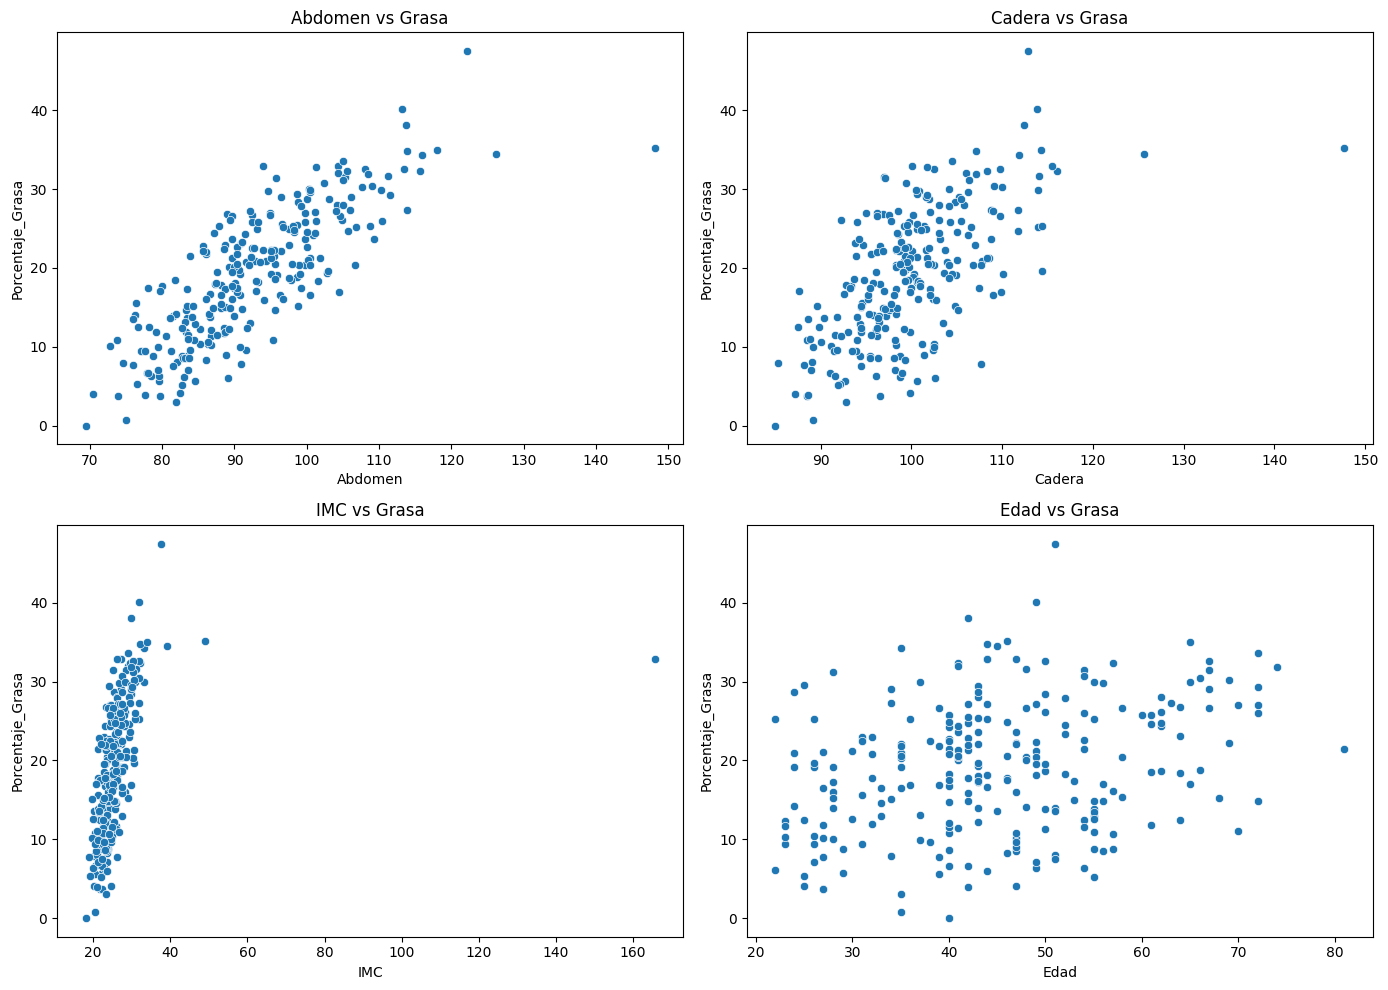

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.scatterplot(data=df, x="Abdomen", y="Porcentaje_Grasa", ax=axes[0,0])
axes[0,0].set_title("Abdomen vs Grasa")

sns.scatterplot(data=df, x="Cadera", y="Porcentaje_Grasa", ax=axes[0,1])
axes[0,1].set_title("Cadera vs Grasa")

sns.scatterplot(data=df, x="IMC", y="Porcentaje_Grasa", ax=axes[1,0])
axes[1,0].set_title("IMC vs Grasa")

sns.scatterplot(data=df, x="Edad", y="Porcentaje_Grasa", ax=axes[1,1])
axes[1,1].set_title("Edad vs Grasa")

plt.tight_layout()
plt.show()


In [ ]:
X = df.drop(columns=["Porcentaje_Grasa"])
y = df["Porcentaje_Grasa"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    pred = modelo.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))  # FIX
    r2 = r2_score(y_test, pred)

    resultados.append([nombre, mae, rmse, r2])

df_resultados = pd.DataFrame(resultados, columns=["Modelo","MAE","RMSE","R2"])
df_resultados


,Modelo,MAE,RMSE,R2
0,Regresión Lineal,0.463420,0.627912,0.991524
1,Lasso,0.446579,0.576954,0.992844
2,Decision Tree,0.519608,1.340690,0.961360
3,Random Forest,0.163843,0.232270,0.998840


In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 4, 6, 8]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring="r2")
grid.fit(X_train_scaled, y_train)

grid.best_params_, grid.best_score_


({'max_depth': None, 'n_estimators': 200}, np.float64(0.9615074909039696))

In [ ]:
best_model = grid.best_estimator_
pred = best_model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2:", r2_score(y_test, pred))

MAE: 0.16298039215686305
RMSE: 0.24861325189862554
R2: 0.9986713002268717


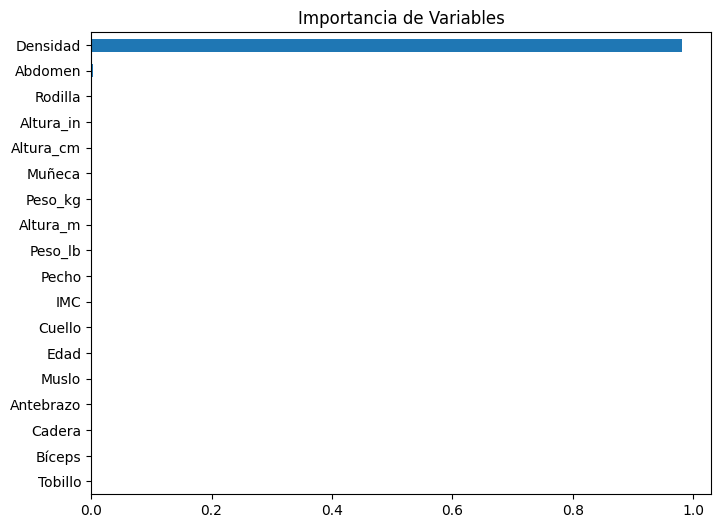

In [ ]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Importancia de Variables")
plt.show()


**Conclusiones Finales**

- El modelo con mejor desempeño fue **Random Forest optimizado**, logrando un R² alto y buen nivel de error.
- Las variables más importantes para predecir grasa corporal fueron:
  - **Abdomen**
  - **Cadera**
  - **Peso**
  - **IMC**
- Las mediciones periféricas (rodilla, tobillo, muslo) aportan menos valor predictivo.
- La predicción permite estimar grasa corporal sin necesidad de equipamiento de laboratorio.

**Líneas futuras**
- Probar modelos más avanzados (XGBoost, LightGBM).
- Aplicar eliminación recursiva de variables (RFE).
- Comparar modelos con y sin outliers.
- Crear una API o dashboard para predicción.
